# CH6. 통계적 머신러닝(statistical machine learning)

## 6.1 k-최근접 이웃(KNN, k-nearest neighbors)
1. 특징들이 가자 유사한(즉, 예측변수들이 유사한) k개 레코드를 찾는다.
2. 분류: 이 유사한 레코드들 중에 다수가 속한 클래스가 무엇인지 찾은 후, 새로운 레코드를 그 클래스에 할당
3. 예측(<b>KNN 회귀, KNN regression</b>라고도 함): 유사한 레코드들의 평균을 찾아서 새로운 레코드에 대한 예측값으로 사용한다.

============================================================================================================
###### 용어정리
 - 이웃(neighbor): 예측변수에서 값들이 유사한 레코드
 - 거리지표(distance metric): 각 레코드 사이가 얼마나 멀리 떨어져 있는지를 나타내는 단일 값
 - 표준화(standardization): 평균을 뺀 후에 표준편차로 나누는 일(유의어: 정규화)
 - z 점수(z-score): 표준화를 통해 얻은 값
 - k: 최근접 이웃을 계산하는 데 사용되는 이웃의 개수

============================================================================================================

 - 특징들이 어떤 척도에 존재하는지, 가까운 정도를 어떻게 측정할 것인지, k를 어떻게 설정할 것인지에 따라 예측 결과가 달라진다.
 - 모든 예측변수들은 수치형이어야 한다.

*k: 예측하고자 하는 값와 근접한 k개 레코드를 활용한다는 것??*

### 6.1.1 예제: 대출 연체 예측

In [8]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [2]:
loan200 = pd.read_csv('C:/data/stats_for_ds/loan200.csv') ;loan200

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81
...,...,...,...
196,default,11.66300,26.09
197,default,2.97641,16.41
198,default,1.96846,19.98
199,paid off,9.64200,20.17


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
predictors = ['payment_inc_ratio', 'dti'] # 각각 소득에 대한 대출 상환 비율, 소득애 대한 부채(모기지 제외) 비율
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors] 
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)
print(knn.predict_proba(newloan))

[[0.45 0.55]]


In [7]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

In [10]:
from matplotlib.patches import Ellipse

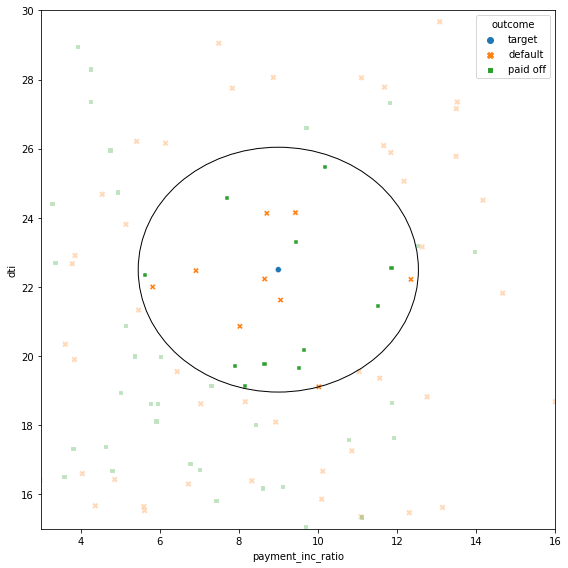

In [12]:
# [그림 6-2] 두 변수를 이용한 KNN의 대출 연체 예측
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

##### NOTE_ 
 - 분류 문제에서 KNN의 결과는 보통 이진형이지만 때로는 0과 1 사이의 확률(경향)을 결과로 줄 수 있다.
 - k개 가장 가까운 점들이 속한 클래스의 비율을 통해 확률을 정할 수 있다.
 - 확률 점수를 통해 간단한 다수결 투표 결과와는 다른 분류 규칙을 만들 수 있다.

### 6.1.2 거리 지표
 - 유사성, similarity (근접성, nearness)은 <b>거리지표</b>를 통해 결정된다.

1. <b>유클리드 거리, Euclidean distance</b>
 - 두 점 사이의 직선 거리
 - 계산상 이점이 있다.
 
 $$ \sqrt {(x_1 - u_1)^2 + (x_2 - u_2)^2 + ... + (x_p - u_p)^2} $$
 
2. <b>맨해튼 거리, Manhattan distance</b>
 - 한 번에 대각선이 아닌 한 축 방향으로만 움직일 수 있다고 할 때(도심지에서 직사각형 건물들 사이를 이동한다고 할 때_, 두 점 사이의 거리
 - 점과 점 사이의 이동 시간으로 근접성ㅇ르 따질 때 좋은 지표
 
 $$ |x_1 - u_1| + |x_2 - u_2| + ... + |x_P - u_p| $$ 
 
3. 기타 지표
 - (1) <b>마할라노비스 거리, Mahalanobis distance </b>
    - 두 변수 간 상관관계 활용
    - 계산에 공분산행렬을 사용하기 때문에 많은 계산이 필요하고 복잡성이 증가하는 단점이 있음.

### 6.1.3 원-핫 인코더
 - 요인변수를 수치형으로 변환하는 방법
 - n개 범주를 갖는 요인변수의 각 범주를 이진 가변수로 변환하여 n개 변수 생성

###### NOTE_
선형 회귀나 로지스틱 회귀에서 원-핫 인코딩은 다중공선성과 관련된 문제를 일으킨다. 이런 경우 한 가변수를 생략하는 방법이 있다.
BUT, 이 책에서 다루는 KNN이나 다른 방법에서는 이것이 문제가 되지 않는다.

### 6.1.4 표준화(정규화, z 점수)

*책에서는 표준화와 정규화를 같은 것으로 다루지만, 차이가 있음*
*책에서 다루는 것은 표준화(Standardization)이고, 정규화(Normalization)은 아래에서 따로 다루도록 함*

1.<b>표준화(Standardization)</b>
 - 정규분포의 표준화 공식으로, 어떤 특성의 값들이 정규분포를 따른다고 가정하고 값들을 평균이 0, 표준편차가 1을 갖도록 변환해주는 것
 - 변환된 결과를 일반적으로 <b>z score</b>라고 부름
 $$ z = \frac {x-\bar{x}} {s} $$
 

2. <b>정규화(Normalization)</b>
 - 다음과 같은 공식을 사용해서 특성 값의 범위를 [0, 1]로 옮기는 것
 
 $$ X^\prime = \frac {X-X_{min}} {X_{max}-X_{min}} $$



- 위 두 가지 방법을 모두 사용해보고 어느것이 더 나은지 비교하여 방법 선택

*참고자료*
*https://bskyvision.com/849*

In [22]:
loan_data = pd.read_csv('C:/data/stats_for_ds/loan_data.csv') ;loan_data

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [23]:
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)
loan_data

,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,RENT,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,MORTGAGE,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,MORTGAGE,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,MORTGAGE,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [24]:
# 스케일링 하지 않고 fit KNN
predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
print(newloan)
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

   payment_inc_ratio  dti  revol_bal  revol_util
0             2.3932  1.0       1687         9.4


KNeighborsClassifier()

In [25]:
nbrs = knn.kneighbors(newloan)
print(X.iloc[nbrs[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
42953            1.28160  7.14       1684         3.9
43599            4.12244  8.98       1684         7.2


In [27]:
from sklearn import preprocessing

In [28]:
# 스케일링 후 fit KNN
newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
print(X.iloc[nbrs[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
2080             2.61091  1.03       1218         9.7
1438             2.34343  0.51        278         9.9
30215            2.71200  1.34       1075         8.5
28542            2.39760  0.74       2917         7.4
44737            2.34309  1.37        488         7.2


### 6.1.5 k 선택하기
 - k가 너무 작으면 Overfitting 문제 발생
 - k가 너무 크면 Overboosting(과대 평탄화) 문제 발생
 
 <br> 
 
 - 최적의 k값 위해 지표 활용
  - 홀드아웃 데이터 또는 타당성 검사를 위해 따로 뗴어놓은 데이터에서 정확도 측정하여 k값 결정에 사용
 
 <br> 
 
 - 노이즈가 거의 없고 아주 잘 구조화된 데이터의 경우 k값이 작을수록 잘 동작
 - 노이즈가 많은 경우 k가 클수록 좋다.
 
 <br> 
 
 - 보통 k를 1과 20 사이에 놓는다.
 - 동률이 나오는 경우를 막기 위해 보통은 홀수를 사용한다.


###### NOTE_ 편향-분산 트레이드오프(bias-variance tradeoff)
 - 과대 평탄화(오버부스팅)와 과대적합화(오버피팅) 사이의 이율배반 관계를 의미
 - 편향: 모델이 실제 세계를 정확히 표현하지 못하기 때문에 발생하는 모델링 오차를 의미
 - 유연한 모델에서 오버피팅이 발생했다면 분산이 증가했음을 의미
 - 트레이드오프를 다루기 위해 일반적으로 <b>교차타당성검사</b> 방법 활용


### 6.1.6 KNN을 통한 피처 엔지니어링
- KNN은 구현이 간단하고 직관적이지만, 성능 면에서는 경쟁력이 떨어짐
- BUT, 실용적인 측면에서 다른 분류 방법들의 특정 단계에 사용할 수 있게 모델에 '지역적 정보, local knowledge'를 추가하기 위해 활용 가능

 1. KNN은 데이터에 기반하여 분류 결과(클래스에 속할 확률)를 얻는다.
 2. 이 결과는 해당 레코드에 새로운 특징(피처)으로 추가된다. 이 결과를 다른 분류 방법에 사용한다. 원래 예측변수들(X)을 두 번씩 사용하는 셈이 된다.
 
 <br>
 
- *!다중공선성 문제를 야기시키는건 아닐까?*
 - 문제가 되지 않는다.
 - 위 2단계에서 얻은 정보는 소수의 근접한 레코드들로부터 얻은 매우 지엽적인 정보로, 새로 얻은 정보는 불필요하거나 중복성이 있지 않다.

In [29]:
loan_data = pd.read_csv('C:/data/stats_for_ds/loan_data.csv') ;loan_data

loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

loan_data

,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,RENT,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,MORTGAGE,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,MORTGAGE,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,MORTGAGE,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [30]:
predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 
              'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

In [32]:
import random

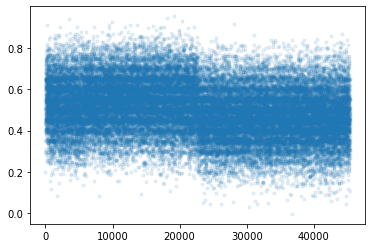

In [33]:
plt.scatter(range(len(X)), [bs + random.gauss(0, 0.015) for bs in knn.predict_proba(X)[:,0]], 
            alpha=0.1, marker='.')

In [34]:
knn.predict_proba(X)[:, 0]

loan_data['borrower_score'] = knn.predict_proba(X)[:, 0]
print(loan_data['borrower_score'].describe())

count    45342.000000
mean         0.501104
std          0.128734
min          0.000000
25%          0.400000
50%          0.500000
75%          0.600000
max          0.950000
Name: borrower_score, dtype: float64


###### 주요개념
 - $k$-최근접 이웃(KNN) 방법이란 유사한 레코드들이 속한 클래스로 레코드를 분류하는 방법
 - 유사성(거리)은 유클리드 거리나 다른 관련 지표들을 이용해 결정
 - 가장 가까운 이웃 데이터의 개수를 의미하는 $k$는 학습 데이터에서 얼마나 좋은 성능을 보이는지를 가지고 결정
 - 일반적으로 예측변수들을 표준화(스케일링)한다. 이를 통해 스케일이 큰 변수들의 영향력이 너무 커지지 않도록 한다.
 - 예측 모델링의 첫 단계에서 종종 KNN을 사용한다. 이렇게 얻은 값을 다시 데이터에 하나의 <b>예측변수</b>로 추가해서 두 번째 단계의 (KNN이 아닌) 모델링을 위해 사용한다.